In [48]:
import pandas as pd

# Load dataset
df = pd.read_csv('ham-spam.csv')
df = df.drop_duplicates() 


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IsSpam  999 non-null    int64 
 1   Text    999 non-null    object
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [ ]:
#Check for duplicate rows in the dataset.


In [52]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with bigrams and English stop words
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(df['Text'])  # Transform the text data
y = df['IsSpam']  # Target variable


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [56]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

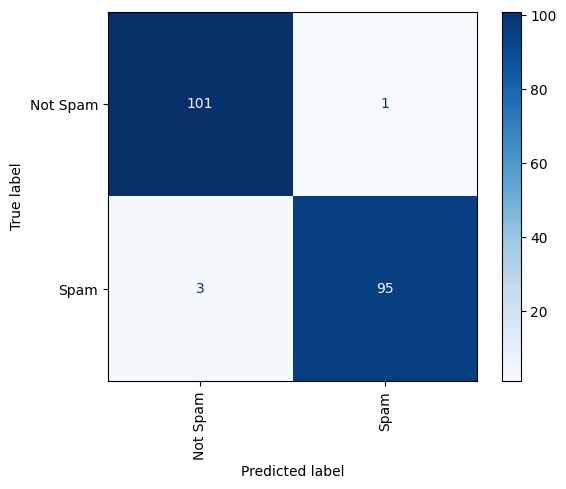

In [58]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=['Not Spam', 'Spam'],
    cmap='Blues',
    xticks_rotation='vertical'
)


In [60]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Model accuracy on the test set
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# ROC AUC score
probabilities = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probabilities[:, 1])
print("ROC AUC Score:", roc_auc)


Accuracy: 0.98
ROC AUC Score: 0.9992997198879552


In [62]:
# Example messages
messages = ['Can you attend a code review on Tuesday?', 
            'Why pay more for expensive meds when you can order them online and save $$$?']

# Transform and predict
for message in messages:
    message_transformed = vectorizer.transform([message])
    prediction = model.predict(message_transformed)[0]
    prediction_proba = model.predict_proba(message_transformed)[0]

    print(f"Message: {message}")
    print(f"Prediction: {'Spam' if prediction == 1 else 'Not Spam'}")
    print(f"Probability of Spam: {prediction_proba[1]:.4f}\n")


Message: Can you attend a code review on Tuesday?
Prediction: Not Spam
Probability of Spam: 0.0019

Message: Why pay more for expensive meds when you can order them online and save $$$?
Prediction: Spam
Probability of Spam: 0.9998

